In [47]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 4
Problem 2
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 4\nProblem 2\n'

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

In [49]:
df = pd.read_csv("Housing.csv")
df_copy = df.copy()

#categorical inputs that need to be mapped to numbers
non_num_varlist = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

#mapping function
def to_num(x):
    return x.map({"yes": 1, "no": 0})

#map inputs and output new dataframe
df[non_num_varlist] = df_copy[non_num_varlist].apply(to_num) #copy df is to avoid problems if you rerun cell
del df['furnishingstatus']


#min max scaler is better
#scaler = StandardScaler()
scaler = MinMaxScaler()
standardized_df = scaler.fit_transform(df)
DF = pd.DataFrame(standardized_df)


Y = DF.pop(0)
X = DF

In [50]:
r2_test_history = list()
r2_train_history = list()
mse_test_history = list()
mse_train_history = list()
for pca_num in range(1, 12):
    pca = PCA(n_components=pca_num)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size=.8, random_state=7)
    
    classifier = SVR(kernel='rbf')
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    Y_pred2 = classifier.predict(X_train)
    r2_test_history.append(metrics.r2_score(Y_test, Y_pred))
    r2_train_history.append(classifier.score(X_train, Y_train))
    mse_test_history.append(metrics.mean_squared_error(Y_test, Y_pred))
    mse_train_history.append(metrics.mean_squared_error(Y_train, Y_pred2))

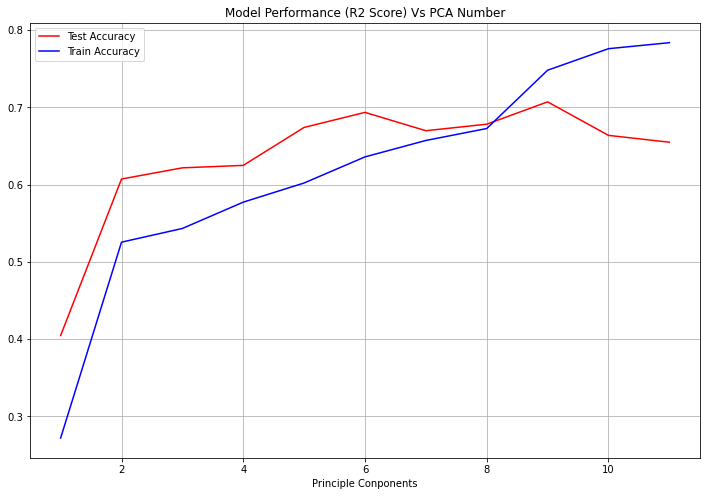

In [51]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(range(1, 12), r2_test_history, label="Test Accuracy", color='red')
plt.plot(range(1, 12), r2_train_history, label="Train Accuracy", color='blue')
plt.xlabel("Principle Conponents")
plt.title("Model Performance (R2 Score) Vs PCA Number")
plt.legend()
plt.grid()
plt.show()

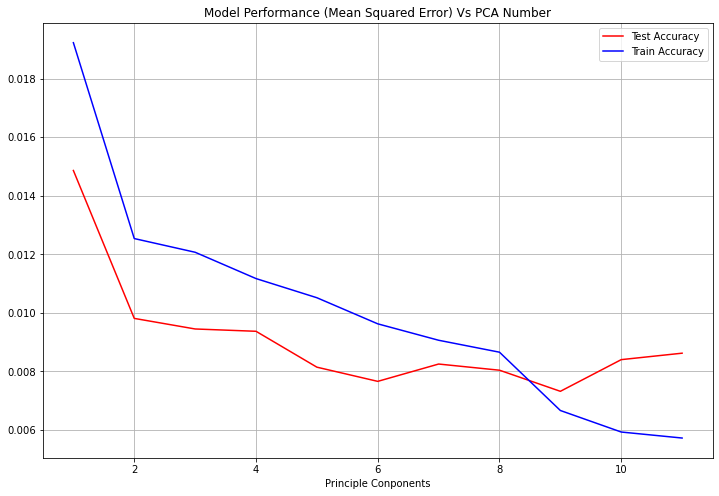

In [52]:
plt.plot(range(1, 12), mse_test_history, label="Test Accuracy", color='red')
plt.plot(range(1, 12), mse_train_history, label="Train Accuracy", color='blue')
plt.xlabel("Principle Conponents")
plt.title("Model Performance (Mean Squared Error) Vs PCA Number")
plt.legend()
plt.grid()
plt.show()

In [53]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size=.8, random_state=7)

classifier = SVR(kernel='rbf')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred2 = classifier.predict(X_train)

In [54]:
print("Train set MSE:", metrics.mean_squared_error(Y_train, Y_pred2))
print("Test set MSE:", metrics.mean_squared_error(Y_test, Y_pred))
print("Train set R2 score:", metrics.r2_score(Y_train, Y_pred2))
print("Test set R2 score:", metrics.r2_score(Y_test, Y_pred))

Train set MSE: 0.006657826026871647
Test set MSE: 0.0073137120497441905
Train set R2 score: 0.7479439736466951
Test set R2 score: 0.7069932866645069


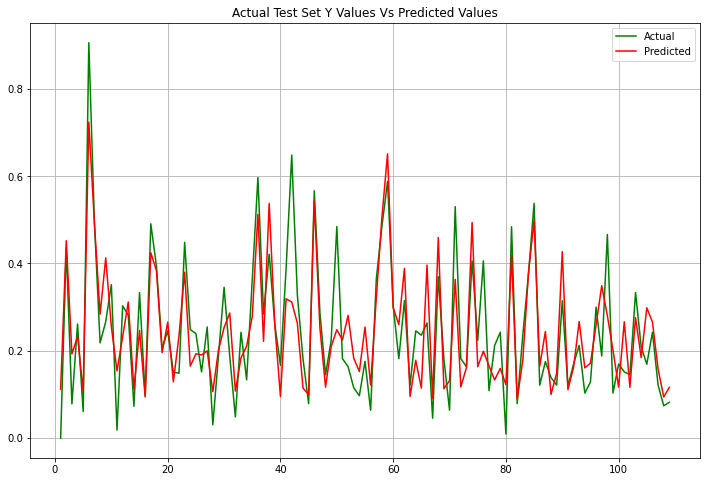

In [55]:
plt.plot(range(1, 110), Y_test, label="Actual", color='green')
plt.plot(range(1, 110), Y_pred, label="Predicted", color='red')
plt.title("Actual Test Set Y Values Vs Predicted Values")
plt.legend()
plt.grid()
plt.show()